# Execute this cell

In [15]:
from ADMCode import visualize as vis
from ADMCode import qlearn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore")
sns.set(style='white', font_scale=1.3)

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.savefig.dpi = 150

# Q-learning

### Equations
---
* **Q-update**: $$Q(a_i) \leftarrow  Q(a_i) + \alpha (r_t - Q(a_i))$$

* **Softmax policy**: $$P(a_i) = \frac{e^{\beta Q(a_i)}}{\sum_j^N e^{\beta Q(a_j)}}$$

#  Questions: 
#### (double click on the cells below to edit)

## **Question 1:**  

**test different values of $\beta$ in the code cell below to help answer Question 1a-b**

**1a)** As the inverse temperature parameter ($\beta$) increases, what impact does this have on the probability of selecting actions with higher Q values?

* **Answer 1a:** 


**1b)** In a two-choice RL task, if the selection probability of one action increases (given the softmax equation) what must be true of the selection probability of the alternative action? Explain why.

* **Answer 1b:** 




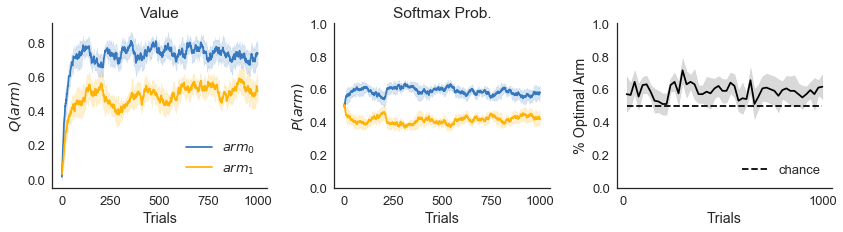

In [16]:
# DEFINE AGENT FOR PLAYING A TWO-ARMED BANDIT TASK
agent2 = qlearn.Qagent(alpha=.08, preward=[.75, .5])
# EDIT THE CODE BELOW TO SIMULATE WITH DIFFERENT
# VALUES OF BETA (INCREASE BETA = MORE EXPLOITATIVE)
b=1.5
agent2.set_params(beta=b)
data = agent2.simulate_multiple(nsims=10, ntrials=1000)
vis.plot_qlearning(data)

## **Question 2**

A high learning rate results in agents with a heightened sensitivity to feedback from the environment. 

**2a)** Describe **environments/tasks** in which a higher $\alpha$ is *advantageous* to the **goals** of the agent.

* **Answer 2a:** 

**2b)** What about environments/tasks in which this could be *disadvantageous*?

* **Answer 2b:**



## **Question 3**

**test different values of $\alpha$ and $\beta$ in the two code cells below to compare performance on 2-armed (first cell) and 4-armed (second cell) bandit tasks to help answer Question 3**

**3)** In lab, we observed how the combination of a high learning rate (i.e., high $\alpha$) and an exploitative decision policy (i.e., high $\beta$) can negatively impact performance on a multi-armed bandit task. Explain in plain words how these two parameters interact at upper extremes. Consider the role of randomness in the environment (i.e., feedback) observed by the agent, particularly how different early observations contribute to later behavior under different.combinations of $\alpha \, \& \, \beta$

* **Answer 3:** 

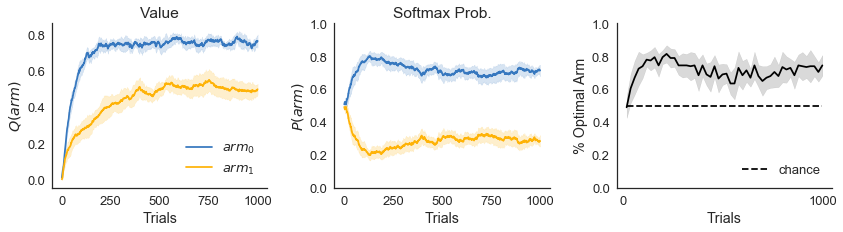

In [17]:
# DEFINE AGENT FOR PLAYING A TWO-ARMED BANDIT TASK
agent2 = qlearn.Qagent(alpha=.08, preward=[.75, .5])
# EDIT THE CODE BELOW TO SIMULATE WITH DIFFERENT
# COMBINATIONS OF ALPHA and BETA
a = .03
b = 3.5
agent2.set_params(alpha=a, beta=b)
data = agent2.simulate_multiple(nsims=10, ntrials=1000)
vis.plot_qlearning(data)

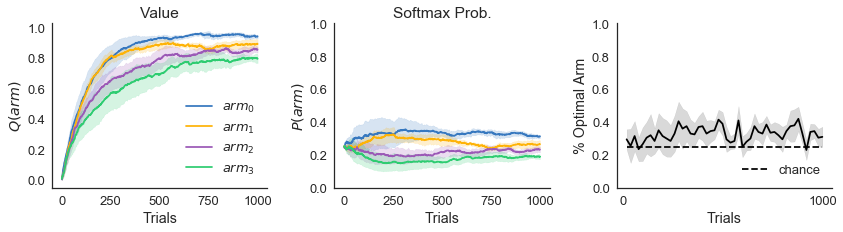

In [18]:
# DEFINE AGENT FOR PLAYING A FOUR-ARMED BANDIT TASK
agent4 = qlearn.Qagent(preward=[.95, .9, .85, .8])
# EDIT THE CODE BELOW TO SIMULATE WITH DIFFERENT
# COMBINATIONS OF ALPHA and BETA
a = .03
b = 3.5
agent4.set_params(alpha=a, beta=b)
data = agent4.simulate_multiple(nsims=10, ntrials=1000)
vis.plot_qlearning(data)

## **Question 4:**  
In lab and in the code cells above, we simulated a Q-learning agent assuming the same sensitivity to ***all*** prediction errors $\delta$, regardless of valence ( $+/-$ ), i.e., a single value of $\alpha$ for both $+\delta$ and $-\delta$. A number of studies have found evidence that human observers exhibit different rates of learning when feedback failes to meet their expectations $r_t-Q(a_i)<0$ compared to feedback that exceeds their expectations $r_t-Q(a_i)>0$. 

**4a)** Why might the brain learn from positive and negative errors at different rates - what goals could this asymmetry help facilitate? 

* **Answer 4a:** 

**4b)** Compare the single-$\alpha$ model to a model with two learning rates - i.e., an $\alpha^{+}$ and $\alpha^-$ for positive and negative errors, respectively. Do you believe adding a second learning rate justifies the additional complexity of the model? In other words, what additional experimental phenomena do you think it could account for that a single-$\alpha$ model could not?

* **Answer 4b:** 


## **Bonus Problem**  

**a)** Modify the code below to implement an Q-agent with different learning rates for positive and negative prediction errors (see **Q4** for more information).

* **Bonus Answer a:** *copy/paste your modified code into a code cell below* 

**b)** Run a set of simulations with your modified function with no errors.

* **Bonus Answer b:** *you get credit if I can run your modified code*

# Q-learning code

In [10]:
def update_Qi(Qval, reward, alpha):
    """ update q-value of selected action, given reward and alpha
    """
    return Qval + alpha*(reward - Qval)

def update_Pall(Qvector, beta):
    """ update vector of action selection probabilities given
    associated q-values
    """
    return np.array([np.exp(beta*Q_i) / np.sum(np.exp(beta * Qvector)) for Q_i in Qvector])

def play_bandits(alpha=.1, beta=.15, preward=[.8, .5, .2], ntrials=1000):
    """ 
    ::Arguments::
        alpha (float): learning rate
        beta (float): inverse temperature parameter
        preward (list): 1xN vector of P(reward) for each of N bandits
        ntrials (int): number of trials to play bandits
    ::Returns::
        pandasDF (Ntrials x Nbandits), trialwise Q/P values per bandit
    """
    nact = len(preward)
    actions = np.arange(nact)  
    rvalues = np.ones(nact)
    
    bandits = qlearn.MultiArmedBandit(preward=preward, rvalues=rvalues)
    
    Qmatrix=np.zeros((ntrials, nact))
    Pmatrix=np.zeros_like(Qmatrix)
    Qvalues = Qmatrix[0, :]
    Pvalues = np.array([1/nact]*nact)

    for t in range(ntrials):
        # select bandit arm (action)
        act_i = np.random.choice(actions, p=Pvalues)
        
        # observe feedback
        r = bandits.get_feedback(act_i)
        # get expected value 
        Qexpected = Qvalues[act_i]
        # update expected value and store in Qvalues array
        # Qexpected + alpha * (r - Qexpected)
        Qvalues[act_i] = update_Qi(Qexpected, r, alpha)
        
        # update action selection probabilities 
        Pvalues = update_Pall(Qvalues, beta)
        
        # store new values in output matrices
        Qmatrix[t, :] = Qvalues
        Pmatrix[t, :] = Pvalues
        
    return make_output_df(Qmatrix, Pmatrix)  

def make_output_df(Qmatrix, Pmatrix):
    """ generate output dataframe with trialwise Q and P measures for each bandit,
    as well as choice selection, and feedback
    ::Arguments::
        Qmatrix (ndarray): q-value array with dims [Ntrials x Nbandits] 
        Pmatrix (ndarray): softmax prob array with dims [Ntrials x Nbandits] 
    ::Returns::
        df (DataFrame): pandas df containing Q and P values for each bandit [Ntrials x 2*Nbandits]
    """
    actions = np.arange(Qmatrix.shape[1])
    df = pd.concat([pd.DataFrame(dat) for dat in [Qmatrix, Pmatrix]], axis=1)
    cols = [['{}{}'.format(x,c) for c in actions] for x in ['q', 'p']]
    df.columns = np.hstack(cols)
    df.insert(0, 'trial', np.arange(1, df.shape[0]+1))
    return df

In [12]:
df = play_bandits(alpha=.1, beta=2, preward=[.85, .75, .65])
df.head()

,trial,q0,q1,q2,p0,p1,p2
0,1,0.9238,0.7231,0.3944,0.3333,0.3333,0.3333
1,2,0.1000,0.0000,0.0000,0.3792,0.3104,0.3104
2,3,0.1000,0.1000,0.0000,0.3548,0.3548,0.2905
3,4,0.1900,0.1000,0.0000,0.3970,0.3316,0.2715
4,5,0.1900,0.1900,0.0000,0.3726,0.3726,0.2548


## Build your modified Q-agent for bonus pts

In [ ]:
def update_Qi_mod(Qval, reward, alpha):
    """ update q-value of selected action, given reward and alpha (and ??????)
    """
    ##############################################################
    #            COPY/PASTE/MODIFY CODE BELOW                    #
    # NOTE: YOU MAY NEED ADDITIONAL ARGUMENTS TO THIS FUNCTION   #
    ##############################################################
        

def sim_bandits_mod(alpha_pos=.1, beta=.15, preward=[.8, .5, .2], ntrials=1000):
     """ 
    ::Arguments::
        alpha_pos (float): learning rate
        ?????? (float): ???????????????????
        beta (float): inverse temperature parameter
        preward (list): 1xN vector of P(reward) for each of N bandits
        ntrials (int): number of trials to play bandits
    ::Returns::
        pandasDF (Ntrials x Nbandits), trialwise Q/P values per bandit
    """
    nact = len(preward)
    actions = np.arange(nact)  
    rvalues = np.ones(nact)
    bandits = qlearn.MultiArmedBandit(preward=preward, rvalues=rvalues)
    
    Qmatrix=np.zeros((ntrials, nact))
    Pmatrix=np.zeros_like(Qmatrix)
    Qvalues = Qmatrix[0, :]
    Pvalues = np.array([1/nact]*nact)
    
    ##############################################################
    #            COPY/PASTE/MODIFY CODE BELOW                    #
    # NOTE: YOU MAY NEED ADDITIONAL ARGUMENTS TO THIS FUNCTION   #
    ##############################################################
    
    
    # keep this line at the bottom of function 
    # and uncomment (remove #) when you're ready to
    # test your modified model. You get credit if your
    # simulation returns a pandas DF
    # return make_output_df(Qmatrix, Pmatrix)  
    
    
def make_output_df(Qmatrix, Pmatrix):
    """ generate output dataframe with trialwise Q and P measures for each bandit,
    as well as choice selection, and feedback
    ::Arguments::
        Qmatrix (ndarray): q-value array with dims [Ntrials x Nbandits] 
        Pmatrix (ndarray): softmax prob array with dims [Ntrials x Nbandits] 
    ::Returns::
        df (DataFrame): pandas df containing Q and P values for each bandit [Ntrials x 2*Nbandits]
    """
    actions = np.arange(Qmatrix.shape[1])
    df = pd.concat([pd.DataFrame(dat) for dat in [Qmatrix, Pmatrix]], axis=1)
    cols = [['{}{}'.format(x,c) for c in actions] for x in ['q', 'p']]
    df.columns = np.hstack(cols)
    df.insert(0, 'trial', np.arange(1, df.shape[0]+1))
    return df

## Test your modified Q-agent

In [ ]:
# df_mod = sim_bandits_mod()
# df_mod.head()